# Predict MPG for vehicles in this dataset using Random Forest

In [316]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

In [317]:
df = pd.read_csv('data/clean_auto_mpg.csv')

In [318]:
print(df.describe())

       Unnamed: 0         mpg   cylinders  displacement  horsepower  \
count  392.000000  392.000000  392.000000    392.000000  392.000000   
mean   197.579082   23.445918    5.471939    194.411990  104.469388   
std    114.534637    7.805007    1.705783    104.644004   38.491160   
min      0.000000    9.000000    3.000000     68.000000   46.000000   
25%     98.750000   17.000000    4.000000    105.000000   75.000000   
50%    197.500000   22.750000    4.000000    151.000000   93.500000   
75%    295.250000   29.000000    8.000000    275.750000  126.000000   
max    397.000000   46.600000    8.000000    455.000000  230.000000   

            weight  acceleration  model year      origin  
count   392.000000    392.000000  392.000000  392.000000  
mean   2977.584184     15.541327   75.979592    1.576531  
std     849.402560      2.758864    3.683737    0.805518  
min    1613.000000      8.000000   70.000000    1.000000  
25%    2225.250000     13.775000   73.000000    1.000000  
50%   

In [319]:
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [320]:
list(df.columns)

['Unnamed: 0',
 'mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'car name']

In [321]:
df.drop(labels=['Unnamed: 0', 'car name'],axis=1, inplace=True)

## Feature engineering

In [322]:
df['power_weight_ratio'] = df['horsepower']/df['weight']
df['displacement_per_cylinder'] = df['displacement']/df['cylinders']
df['power_weight'] = df['horsepower']*df['weight']
df['displacement_per_cylinder_acceleration'] = (df['displacement']/df['cylinders'])*df['acceleration']
df['displacement_power_weight'] = df['horsepower']*df['weight']*df['displacement']
df['accelration_power_ratio'] = df['acceleration'] / df['horsepower']
df['displacement_power_weight_acc_cylinder'] = df['horsepower']*df['weight']*df['displacement'] / (df['acceleration']*df['cylinders'])
# df['displacement_power_weight_cuberoot'] = (df['horsepower']*df['weight']*df['displacement'])**0.33

## Exploratory Data analysis

/Users/olabodealamu/PycharmProjects/practical_data_science_projects/venv/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

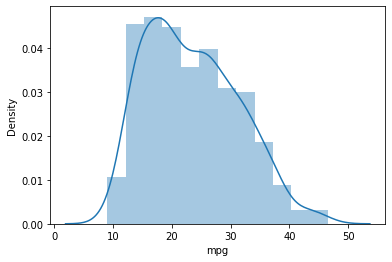

In [323]:
sns.distplot(df['mpg'])

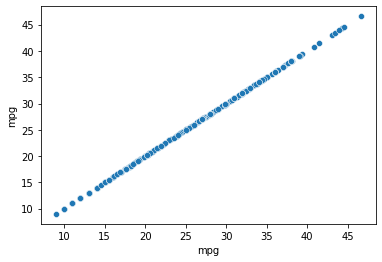

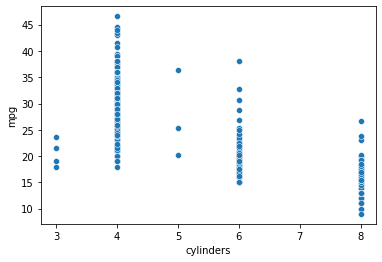

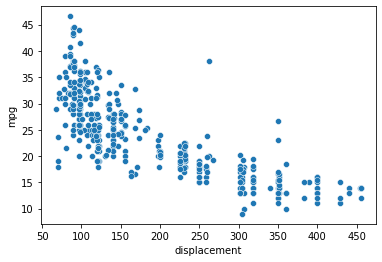

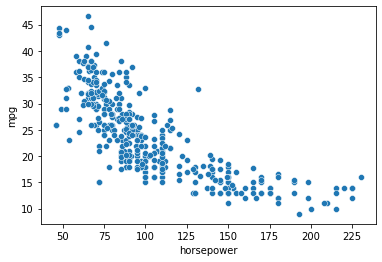

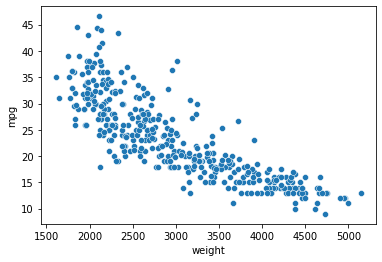

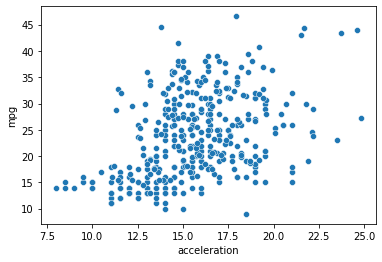

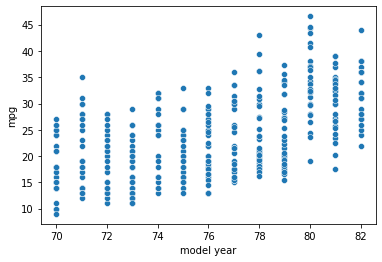

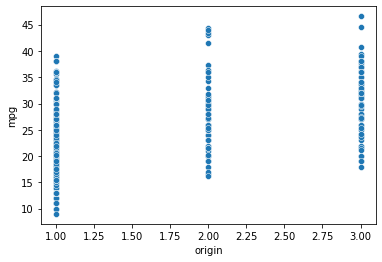

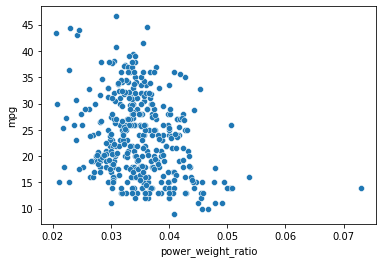

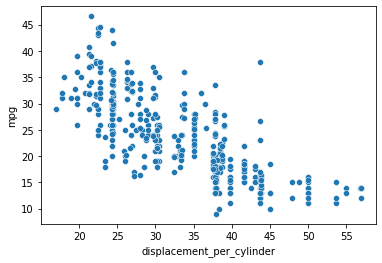

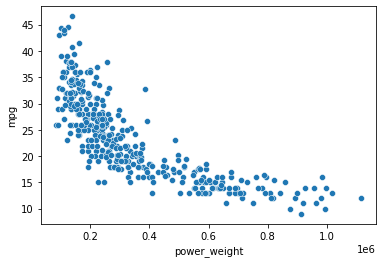

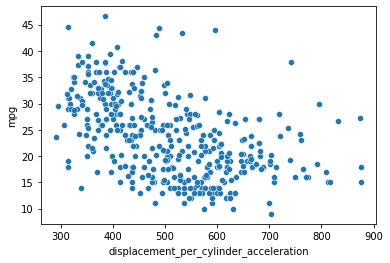

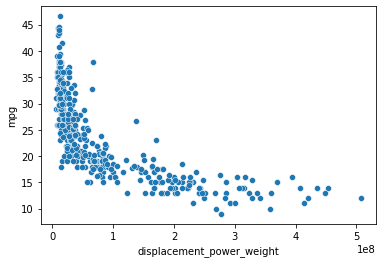

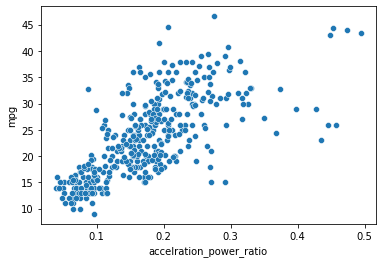

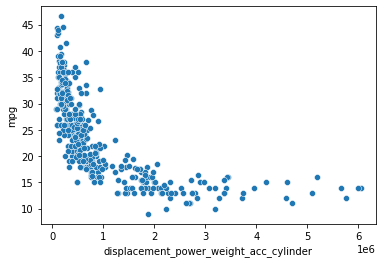

In [324]:
for col in df.columns:
    sns.scatterplot(x=col,y='mpg', data=df)
    plt.show()

In [325]:
df.corr('kendall')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,power_weight_ratio,displacement_per_cylinder,power_weight,displacement_per_cylinder_acceleration,displacement_power_weight,accelration_power_ratio,displacement_power_weight_acc_cylinder
mpg,1.000000,-0.687444,-0.678586,-0.679166,-0.694243,0.303146,0.415247,0.468383,-0.155880,-0.620524,-0.716182,-0.375499,-0.712703,0.572709,-0.689736
cylinders,-0.687444,1.000000,0.796611,0.686146,0.738015,-0.368486,-0.270179,-0.556915,0.128322,0.638206,0.743676,0.351136,0.776432,-0.606068,0.730413
displacement,-0.678586,0.796611,1.000000,0.718471,0.799706,-0.353873,-0.219933,-0.572568,0.120259,0.873385,0.801691,0.476168,0.890281,-0.623668,0.839224
horsepower,-0.679166,0.686146,0.718471,1.000000,0.703730,-0.488239,-0.277831,-0.406024,0.360419,0.637497,0.860221,0.271794,0.804339,-0.829028,0.844431
weight,-0.694243,0.738015,0.799706,0.703730,1.000000,-0.268563,-0.199813,-0.499051,0.052350,0.719276,0.845271,0.488721,0.856660,-0.568552,0.786283
acceleration,0.303146,-0.368486,-0.353873,-0.488239,-0.268563,1.000000,0.198396,0.178324,-0.540650,-0.316076,-0.383449,0.153935,-0.366952,0.664795,-0.458807
model year,0.415247,-0.270179,-0.219933,-0.277831,-0.199813,0.198396,1.000000,0.136037,-0.228358,-0.208194,-0.241046,-0.049442,-0.235376,0.271524,-0.242539
origin,0.468383,-0.556915,-0.572568,-0.406024,-0.499051,0.178324,0.136037,1.000000,0.043294,-0.575540,-0.466721,-0.481308,-0.524306,0.347214,-0.497448
power_weight_ratio,-0.155880,0.128322,0.120259,0.360419,0.052350,-0.540650,-0.228358,0.043294,1.000000,0.092817,0.207338,-0.268592,0.166679,-0.449368,0.233674
displacement_per_cylinder,-0.620524,0.638206,0.873385,0.637497,0.719276,-0.316076,-0.208194,-0.575540,0.092817,1.000000,0.706339,0.544438,0.782446,-0.556221,0.768699


In [326]:
list(df.columns)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'power_weight_ratio',
 'displacement_per_cylinder',
 'power_weight',
 'displacement_per_cylinder_acceleration',
 'displacement_power_weight',
 'accelration_power_ratio',
 'displacement_power_weight_acc_cylinder']

## Model 5

In [327]:
y= df['mpg']
df5=df.drop('mpg', axis=1)
X_train5, X_test5, y_train5, y_test5 = train_test_split(df5, y, test_size=0.33, random_state=42)

In [328]:
pipe5 = Pipeline(steps=[('scaler', StandardScaler(),),
                       ('Random_forest',RandomForestRegressor(n_estimators=100,criterion='mse',max_depth=None, min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features='auto',max_leaf_nodes=None,min_impurity_decrease=0.0,min_impurity_split=None,bootstrap=True,oob_score=False,n_jobs=None,random_state=None,verbose=0,warm_start=False,ccp_alpha=0.0,max_samples=None,),)])

In [329]:
pipe5.fit(X_train5, y_train5)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Random_forest', RandomForestRegressor())])

In [330]:
prediction5 = pipe5.predict(X_test5)

In [331]:
mae5 = mean_absolute_error(y_test5, prediction5)
r2_5 =r2_score(y_test5, prediction5)
mse5 =mean_squared_error(y_test5, prediction5)
mape5 =mean_absolute_percentage_error(y_test5, prediction5)

In [332]:
print(r2_5)

0.8568818514801197


In [333]:
print(mae5)

1.9336692307692296


In [334]:
print(mse5)

7.557975930769216


In [335]:
print(mape5)

0.08600152513860718


## Model 6

In [293]:
y= df['mpg']
df6=df.drop(['model year', 'power_weight_ratio','mpg',
 'displacement_per_cylinder',
 'power_weight',
 'displacement_per_cylinder_acceleration',
 'displacement_power_weight'], axis=1,)

In [294]:
df6.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'origin', 'accelration_power_ratio'],
      dtype='object')

In [295]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(df6, y, test_size=0.33, random_state=42)

In [296]:
pipe6 = Pipeline(steps=[('scaler', StandardScaler(),),
                       ('Random_forest',RandomForestRegressor(n_estimators=100,criterion='mse',max_depth=None, min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features='auto',max_leaf_nodes=None,min_impurity_decrease=0.0,min_impurity_split=None,bootstrap=True,oob_score=False,n_jobs=None,random_state=None,verbose=0,warm_start=False,ccp_alpha=0.0,max_samples=None,),)])

In [297]:
pipe6.fit(X_train6, y_train6)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Random_forest', RandomForestRegressor())])

In [298]:
prediction6 = pipe6.predict(X_test6)

In [299]:
mae6 = mean_absolute_error(y_test6, prediction6)
r26 =r2_score(y_test6, prediction6)
mse6 =mean_squared_error(y_test6, prediction6)
mape6 =mean_absolute_percentage_error(y_test6, prediction6)

In [300]:
print(r26)

0.6756210322185439


In [301]:
print(mae6)

3.0359115384615385


In [302]:
print(mse6)

17.130241386538447


In [303]:
print(mape6)

0.13129248605999463


In [304]:
# pipe.steps[1][1].coef_

In [305]:
# X_train.columns

## Model 7

In [306]:
df7 = df[['displacement_power_weight', 'displacement_per_cylinder','origin', 'acceleration','accelration_power_ratio',]]

In [307]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(df7, y, test_size=0.33, random_state=42)

In [308]:
pipe7 = Pipeline(steps=[('scaler', StandardScaler(),),
                       ('Random_forest',RandomForestRegressor(n_estimators=100,criterion='mse',max_depth=None, min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features='auto',max_leaf_nodes=None,min_impurity_decrease=0.0,min_impurity_split=None,bootstrap=True,oob_score=False,n_jobs=None,random_state=None,verbose=0,warm_start=False,ccp_alpha=0.0,max_samples=None,),)])

In [309]:
pipe7.fit(X_train7, y_train7)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Random_forest', RandomForestRegressor())])

In [310]:
prediction7 = pipe7.predict(X_test7)

In [311]:
mae7 = mean_absolute_error(y_test7, prediction7)
r27 =r2_score(y_test7, prediction7)
mse7 =mean_squared_error(y_test7, prediction7)
mape7 =mean_absolute_percentage_error(y_test7, prediction7)

In [312]:
print(r27)

0.7000448613515342


In [313]:
mae7

2.993126923076924

In [314]:
mse7

15.840434925

In [315]:
mape7

0.1275659739925932